# Financial History Analysis
* Source 
    * [Machine Learning - Get Your Hands Dirty by Solving Real Industry Challenges with Python](https://nlbsg.udemy.com/course/machine-learning-practical/learn/lecture/11839244#overview)
* Predict if a customer will sign a loan based on their financial history

## Data

* Financial history of customers
    * Age, time employed, etc. 
* Risk scores that are already created based on above features
* Label
    * e-signed
    * Indicate whether user has completed the e-signing process for the loan

## Process
* [Import Source Data](#Import-Source-Data)
* [EDA](#EDA)
    * [Data Cleaning](#Data-Cleaning)
    * [Feature Distribution](#Feature-Distribution)
    * [Feature Correlation With Label](#Feature-Correlation-With-Label)
    * [Feature Correlation Matrix](#Feature-Correlation-Matrix)
* [Feature Engineering](#Feature-Engineering)
* [Data Pre-Procesing](#Data-Pre-Processing)
    * [One Hot Encoding Categorical Features](#one-hot-encoding-categorical-features)
    * [Remove Extra Features](#remove-extra-features)
    * [Train Test Split](#train-test-split)
    * [Feature Normalization](#feature-normalization)
* [Model Building](#Model-Building)
    * [Logistic Regression](#logistic-regression)
    * [SVM (Linear)](#svm-linear)
    * [SVM (RBF)](#svm-rbf)
    * [Random Forest](#random-forest)
    * [Kfold Cross Validation](#kfold-cross-validation)
* [Model Parameter Tuning](#Model-Parameter-Tuning)
* [Model Conclusion](#Model-Conclusion)

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [259]:
%matplotlib inline

In [260]:
random.seed(100)

### Import Source Data

In [261]:
dataset = pd.read_csv('./dataset/P39-Financial-Data.csv')

### EDA

In [262]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [263]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


#### Data  Cleaning

In [264]:
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

#### Feature Distribution

* Only want to plot the numerical features
* Drop label
    * `e_signed` is the label 
* Drop categorical features
    * `pay_schedule` is categorical
* Drop NA values (already checked by last step)
* Drop cols that we don't care about
    * `entry_id` is just an index

In [265]:
dataset.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [266]:
dataset_eda = dataset.drop(columns=["e_signed", "pay_schedule", "entry_id"])

/var/folders/dx/spp2spg10dv8rnxn53dlhmx40000gn/T/ipykernel_47833/940310041.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 3, i+1)


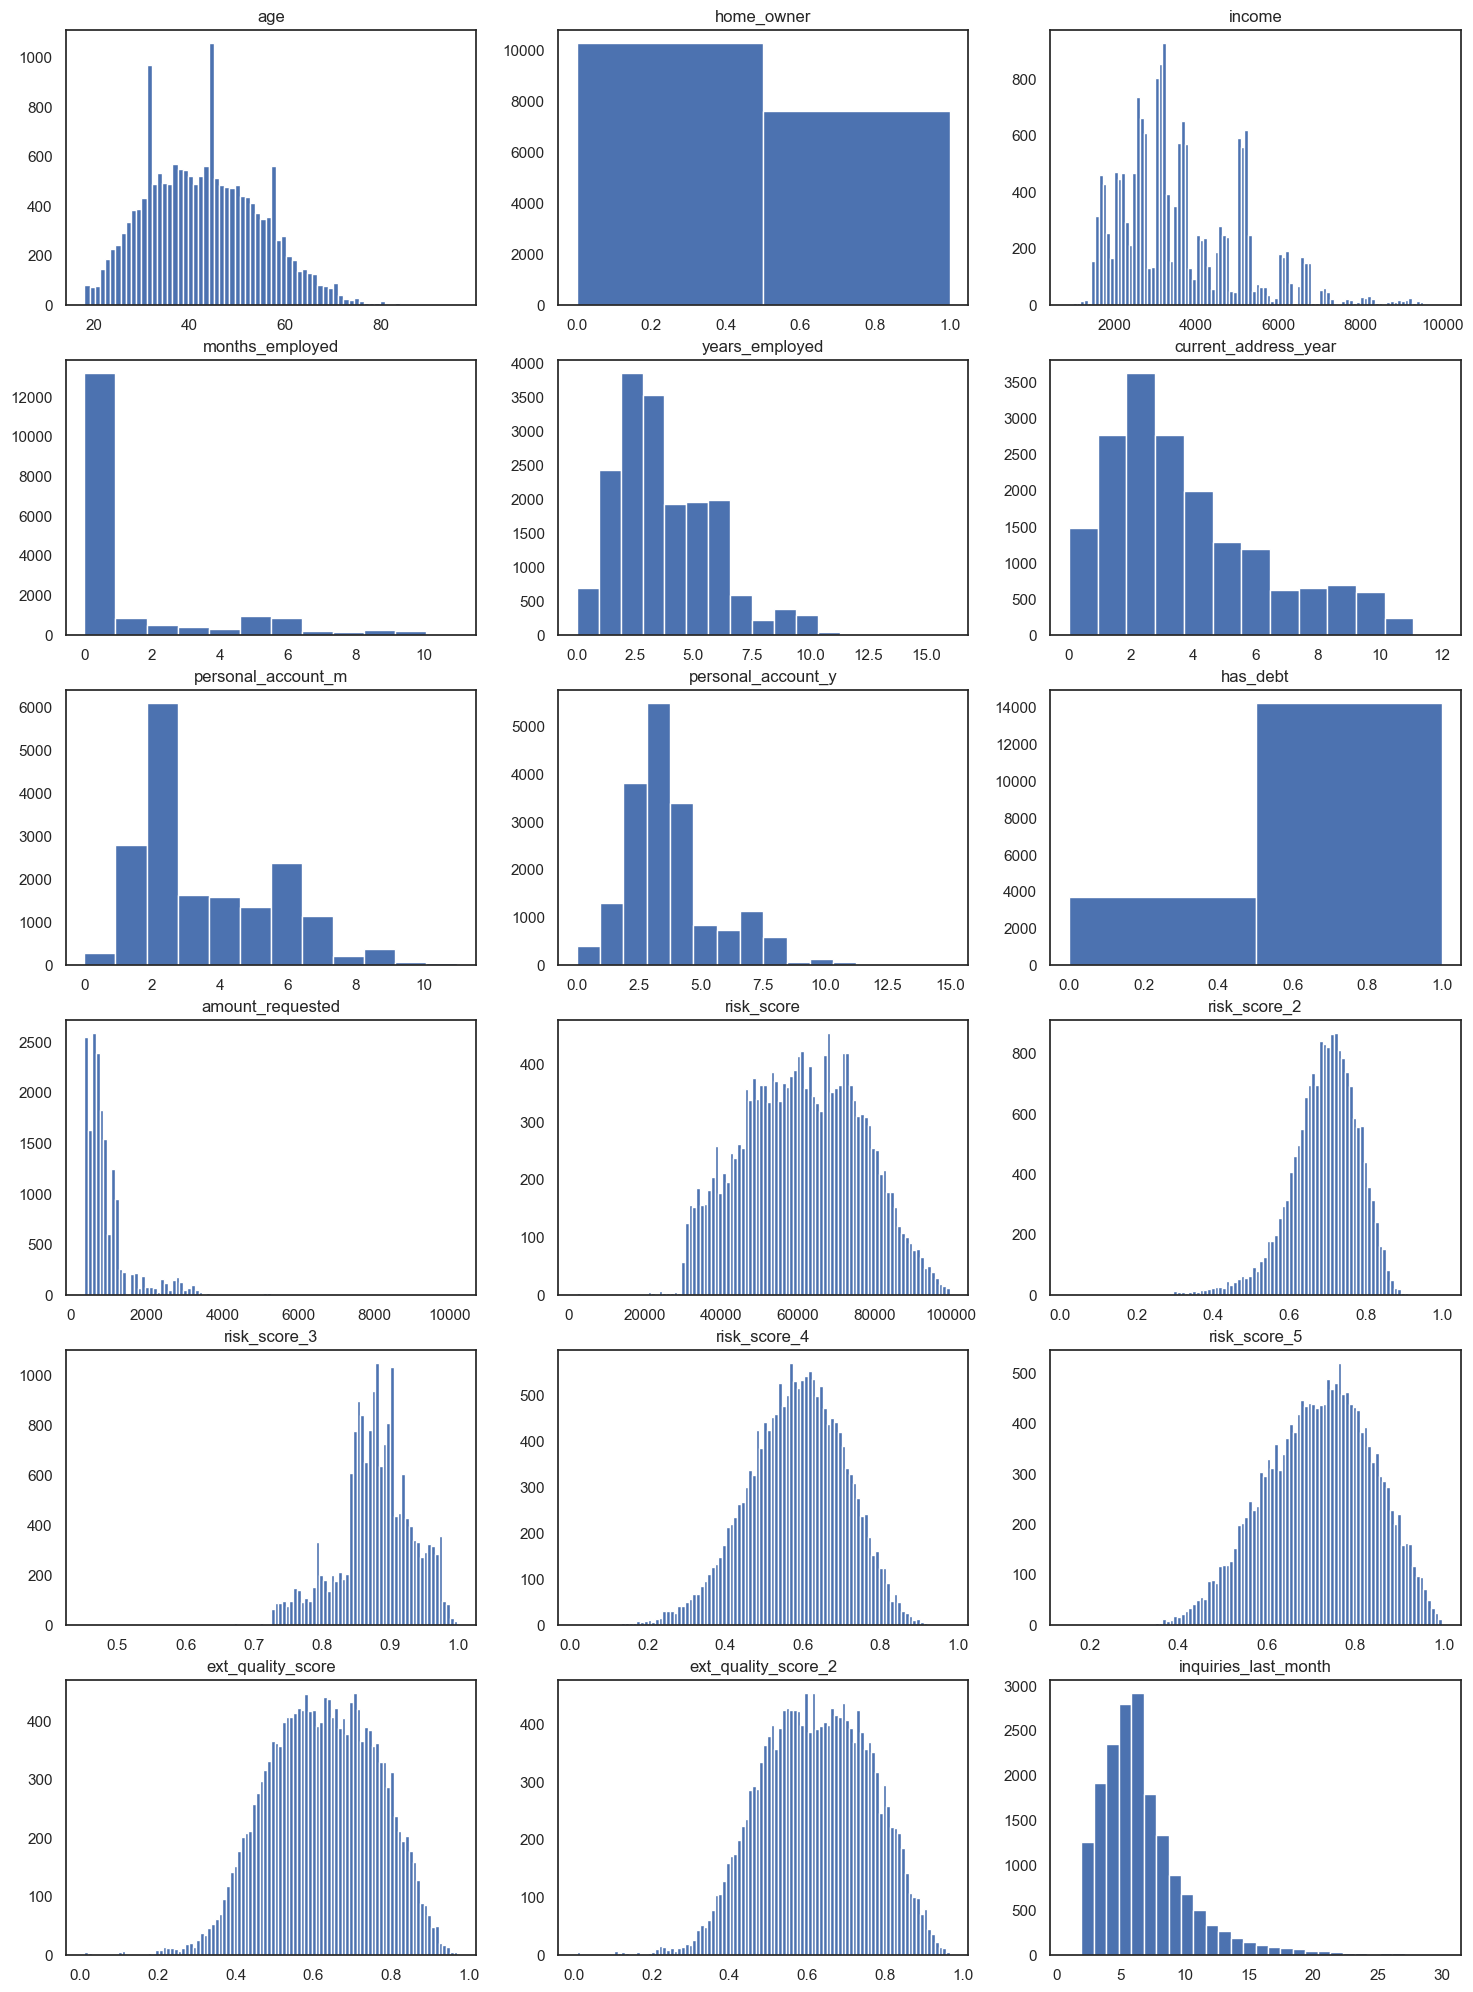

In [267]:
fig = plt.figure(figsize=(18, 25))
plt.title("Distribution of Features")

for i in range(dataset_eda.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(dataset_eda.columns.values[i])

    data = dataset_eda[dataset_eda.columns.values[i]]
    data_size = np.size(data.unique())
    if data_size > 100:
        data_size = 100

    plt.hist(data, bins=data_size)


#### Feature Correlation With Label

<Axes: title={'center': 'Feature Correlation with e_signed'}>

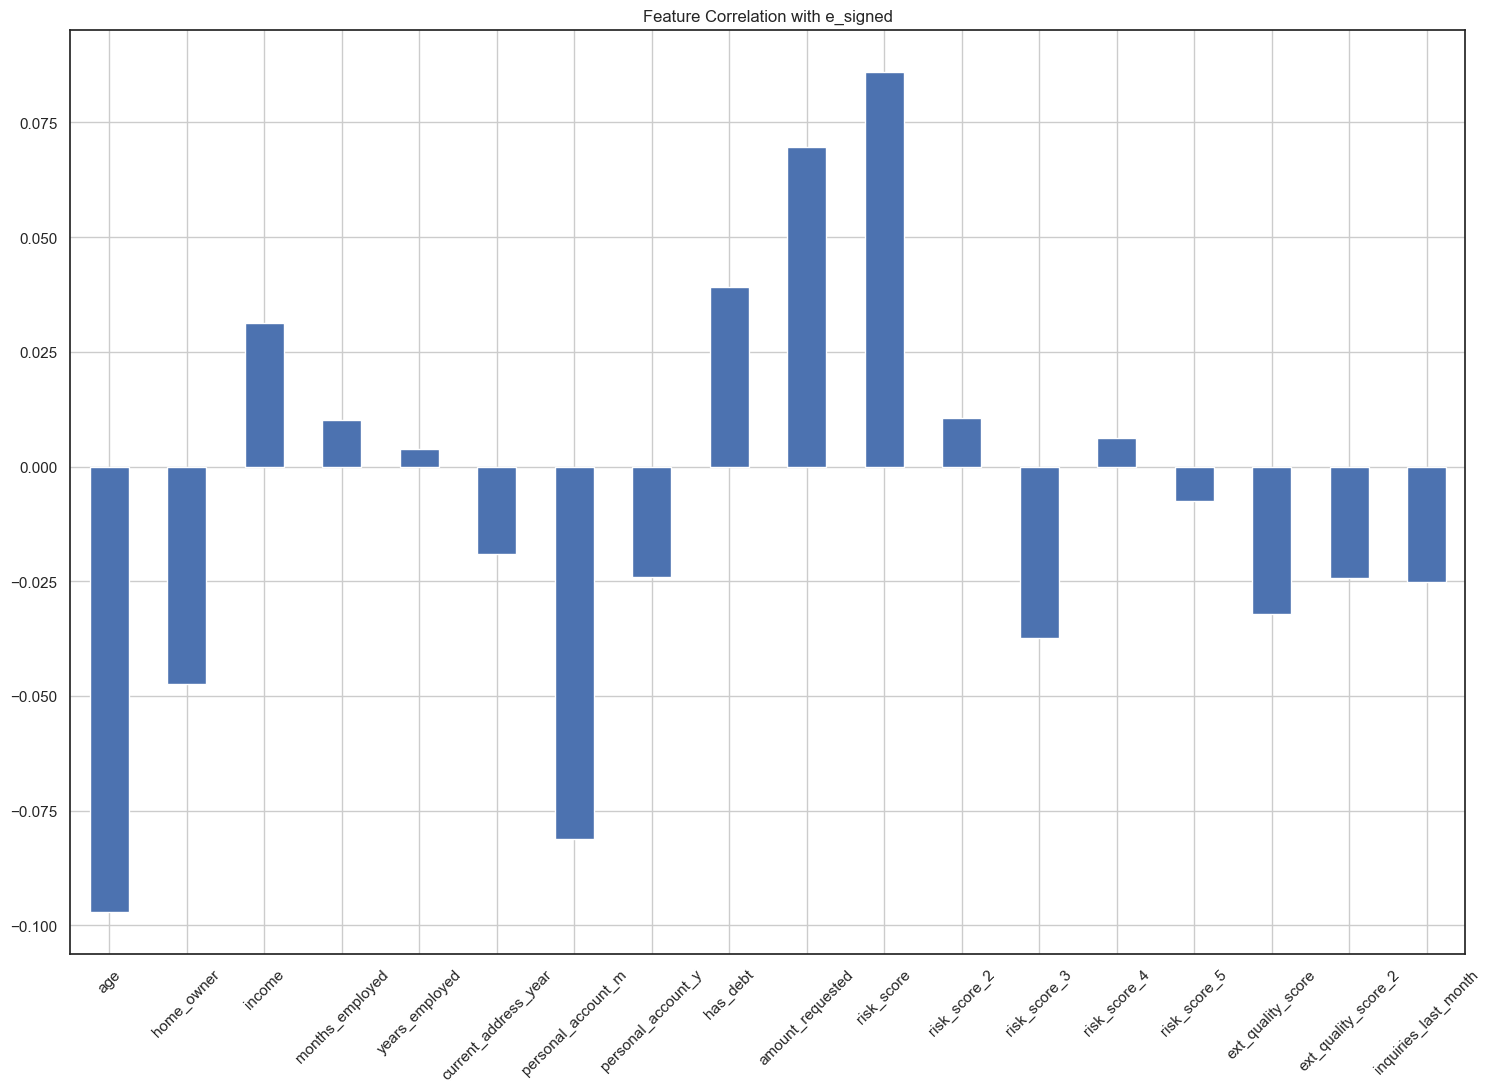

In [268]:
dataset_eda.corrwith(dataset['e_signed']).plot.bar(
    figsize = (18, 12),
    title = 'Feature Correlation with e_signed',
    rot = 45,
    grid = True
)

#### Feature Correlation Matrix

<Axes: >

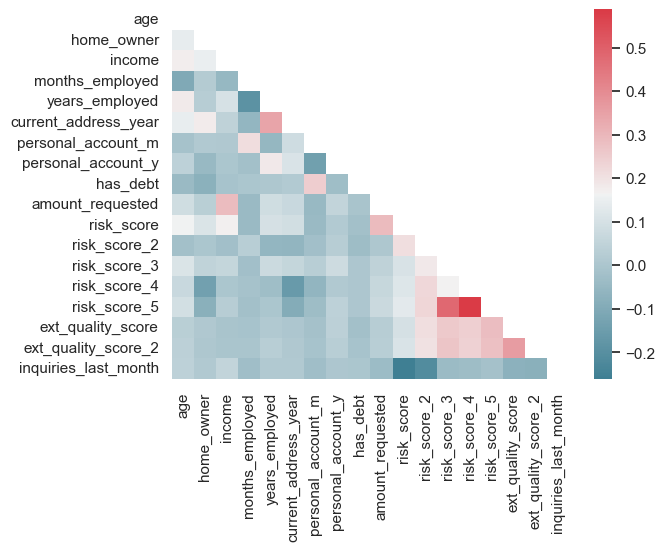

In [269]:
sns.set(style="white")

corr = dataset_eda.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)

### Feature Engineering

The `month_employed` looks a bit faulty <br>
Consider removing it.

<Axes: ylabel='Frequency'>

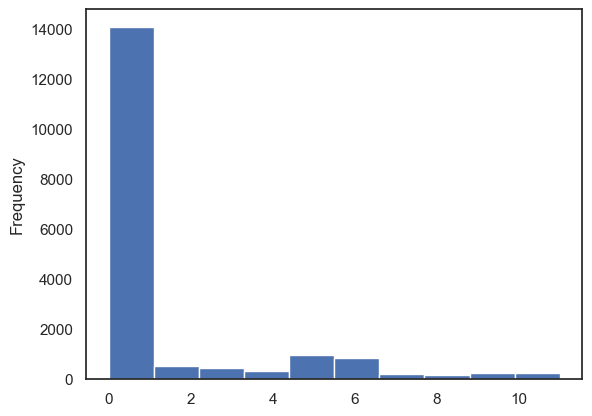

In [270]:
dataset["months_employed"].plot.hist()

In [271]:
dataset = dataset.drop(columns='months_employed')

Combine `personal_account_m` & `personanl_account_y` into a single feature `personal_account_months`

In [272]:
dataset['personal_account_months'] = dataset['personal_account_m'] + 12 * dataset['personal_account_y']
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [273]:
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

### Data Pre-Processing

#### One Hot Encoding Categorical Features

In [274]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'years_employed', 'current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed',
       'personal_account_months'],
      dtype='object')

In [275]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

#### Remove Extra Features

In [276]:
label = dataset["e_signed"]
users = dataset["entry_id"]

dataset = dataset.drop(columns=["e_signed", "entry_id"])

#### Train Test Split

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset,
    label,
    test_size=0.2,
    random_state=0
)

In [279]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14326, 20)
X_test shape: (3582, 20)
y_train shape: (14326,)
y_test shape: (3582,)


#### Feature Normalization

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
sc = StandardScaler()
# Will lose column names and index
sc.fit_transform(X_train)

array([[-0.00599126, -0.85634884, -0.24235846, ..., -0.30236006,
        -0.35607494,  1.97682704],
       [-0.50989022, -0.85634884, -0.05259224, ...,  3.30731512,
        -0.35607494, -0.50586115],
       [-0.7618397 ,  1.16774842, -0.41214928, ..., -0.30236006,
        -0.35607494, -0.50586115],
       ...,
       [ 0.16197506, -0.85634884, -0.46541699, ..., -0.30236006,
        -0.35607494, -0.50586115],
       [ 1.08578982, -0.85634884, -0.69846323, ..., -0.30236006,
         2.80839755, -0.50586115],
       [-0.7618397 , -0.85634884, -0.36554004, ..., -0.30236006,
        -0.35607494, -0.50586115]])

In [282]:
# Add column names and index back
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

### Model Building

#### Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression

##### Train

In [284]:
classifier_logistic_regression = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier_logistic_regression.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

##### Predict

In [285]:
y_pred_logistic_regression = classifier_logistic_regression.predict(X_test)

##### Evaluate

In [286]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [287]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

In [288]:
model_res = pd.DataFrame([
    ["Logistic Regression l1", 
     accuracy_logistic_regression, 
     precision_logistic_regression, 
     recall_logistic_regression, 
     f1_logistic_regression]
], columns=["model", "accuracy", "precision", "recall", "f1"])

#### SVM (linear)

In [289]:
from sklearn.svm import SVC

##### Train

In [290]:
classifier_svm_linear = SVC(random_state=0, kernel='linear')
classifier_svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

##### Predict

In [291]:
y_pred_svm_linear = classifier_svm_linear.predict(X_test)

##### Evaluate

In [292]:
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
precision_svm_linear = precision_score(y_test, y_pred_svm_linear)
recall_svm_linear = recall_score(y_test, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)

In [293]:
svm_linear_res = pd.DataFrame([
    ["SVM Linear", accuracy_svm_linear, precision_svm_linear, recall_svm_linear, f1_svm_linear]],
    columns=["model", "accuracy", "precision", "recall", "f1"]
)

model_res = pd.concat([model_res, svm_linear_res], axis=0, ignore_index=True)
model_res

,model,accuracy,precision,recall,f1
0,Logistic Regression l1,0.563372,0.577844,0.700726,0.633380
1,SVM Linear,0.568677,0.578774,0.729772,0.645561


#### SVM (RBF)

##### Train

In [294]:
classifier_svm_rbf = SVC(random_state=0, kernel='rbf')
classifier_svm_rbf.fit(X_train, y_train)

SVC(random_state=0)

##### Predict

In [295]:
y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

##### Evaluate

In [296]:
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)

In [297]:
svm_rbf_res = pd.DataFrame([
    ["SVM RBF", accuracy_svm_rbf, precision_svm_rbf, recall_svm_rbf, f1_svm_rbf]],
    columns=["model", "accuracy", "precision", "recall", "f1"]
)

model_res = pd.concat([model_res, svm_rbf_res], axis=0, ignore_index=True)
model_res

,model,accuracy,precision,recall,f1
0,Logistic Regression l1,0.563372,0.577844,0.700726,0.633380
1,SVM Linear,0.568677,0.578774,0.729772,0.645561
2,SVM RBF,0.595198,0.609633,0.689315,0.647030


#### Random Forest

In [299]:
from sklearn.ensemble import RandomForestClassifier

##### Train

In [300]:
classifier_random_forest = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')
classifier_random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

##### Predict

In [301]:
y_pred_random_forest = classifier_random_forest.predict(X_test)

##### Evaluate

In [302]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

In [303]:
random_forest_res = pd.DataFrame([
    ["Random Forest", accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest]],
    columns=["model", "accuracy", "precision", "recall", "f1"]
)

model_res = pd.concat([model_res, random_forest_res], axis=0, ignore_index=True)
model_res

,model,accuracy,precision,recall,f1
0,Logistic Regression l1,0.563372,0.577844,0.700726,0.633380
1,SVM Linear,0.568677,0.578774,0.729772,0.645561
2,SVM RBF,0.595198,0.609633,0.689315,0.647030
3,Random Forest,0.621999,0.642361,0.671680,0.656694


#### Kfold Cross Validation

* Random Forest is the best model
* Use Kfold Cross Validation to get a better estimate of the model's performance

In [304]:
from sklearn.model_selection import cross_val_score

In [305]:
accuracies = cross_val_score(estimator=classifier_random_forest, X=X_train, y=y_train, cv=10)

In [307]:
print(f"Random Forest Classifier Accuracy: {accuracies.mean() * 100:.2f}%, Standard Deviation: {accuracies.std() * 100:.2f}%")

Random Forest Classifier Accuracy: 62.68%, Standard Deviation: 1.25%


### Model Parameter Tuning

* Use Grid Search to find the best parameters for the Random Forest model

In [308]:
from sklearn.model_selection import GridSearchCV

In [309]:
parameters = {
    "max_depth": [3, None],
    "max_features": [1, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "bootstrap": [True, False],
    "criterion": ["entropy"]
}

grid_search = GridSearchCV(estimator=classifier_random_forest, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

In [310]:
y_pred_grid_search = grid_search.predict(X_test)

accuracy_grid_search = accuracy_score(y_test, y_pred_grid_search)
precision_grid_search = precision_score(y_test, y_pred_grid_search)
recall_grid_search = recall_score(y_test, y_pred_grid_search)
f1_grid_search = f1_score(y_test, y_pred_grid_search)

grid_search_res = pd.DataFrame([
    ["Random Forest Grid Search", accuracy_grid_search, precision_grid_search, recall_grid_search, f1_grid_search]],
    columns=["model", "accuracy", "precision", "recall", "f1"]
)

model_res = pd.concat([model_res, grid_search_res], axis=0, ignore_index=True)
model_res

,model,accuracy,precision,recall,f1
0,Logistic Regression l1,0.563372,0.577844,0.700726,0.633380
1,SVM Linear,0.568677,0.578774,0.729772,0.645561
2,SVM RBF,0.595198,0.609633,0.689315,0.647030
3,Random Forest,0.621999,0.642361,0.671680,0.656694
4,Random Forest Grid Search,0.632607,0.647969,0.695021,0.670671


### Model Conclusion

In [313]:
final_results = pd.concat([y_test, users], axis=1).dropna()
final_results['predictions'] = y_pred_grid_search
final_results = final_results[['entry_id', 'e_signed', 'predictions']].reset_index(drop=True)

final_results.head(20)

,entry_id,e_signed,predictions
0,8825262,1.0,0
1,9216889,1.0,0
2,1762129,0.0,1
3,7249770,1.0,1
4,5967375,1.0,1
5,4009856,1.0,0
6,4991941,1.0,1
7,7842967,1.0,1
8,8066551,1.0,1
9,3635893,1.0,0
